## 5. CNN using PyTorch
- Using PyTorch we create a CNN with 2 convolutional and 2 fully connected layers

In [1]:
# Import all packages
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

The following CNN architecture works as follows:
1. We run the matrix through an initial convolution
2. Followed by an ReLu activation.
3. Finally we run the result through a MaxPooling function
4. We repeat this twice to have a CNN with 2 convolutions and 2 fully connected layers

The project matrix are like so:
* After the first convolution, the output matric has dimensions 28x28 px.
* After running a MaxPool function through the matrix we cut the dimensions in half 14x14px.
* We have two convolutions that we connect a MaxPooling function to so after the second convolution we are left with an image of size 7x7.

The convolution parameters are as follows:
* Kernel = 5
* padding = 2
* stride = 1
* dilation = 1

And the MaxPooling parameters are as follows:
- Kernel = 2
- padding = 0
- stride = 0
- dilation = 1

In [2]:
# CNN
#
# Parameters:
#
# out_1: the number of output channels of the 1st convolutions
# out_2: the number of output channels of the 2nd convolutions
# out_mp2: the matrix dimension after the second pooling ftn
class CNN(nn.Module):
    def __init__(self, out_1, out_2, out_mp2):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels   =   1,      # number of channels in the input layer
                              out_channels  =   out_1,   # number of channels in the output layer
                              kernel_size   =   3,      # size of the kernel or receiptive field
                              padding       =   1)
        self.maxpool1=nn.MaxPool2d(kernel_size = 2)

        self.cnn2 = nn.Conv2d(in_channels   =   out_1,
                              out_channels  =   out_2,
                              stride        =   1,
                              kernel_size   =   3,
                              padding       =   1)
        self.maxpool2=nn.MaxPool2d(kernel_size = 2)
        # self.softmax = nn.Softmax(dim=1)
        # self.sigmoid = nn.Sigmoid()


        self.fc1 = nn.Linear(                   # create a fully-connected layer between successive layers
                              out_2 * out_mp2,  # numbers of in features - fully connected between lower level of X
                              10)              # number of out features - to a a higher level of Y
    
    # Prediction
    def forward(self, x):
        # CNN 1
        x = self.cnn1(x)          # apply conv 1
        x = torch.relu(x)         # apply activation layer 1
        x = self.maxpool1(x)
        
        
        x = self.cnn2(x)          # apply conv 2
        x = torch.relu(x)         # apply activation layer 2
        x = self.maxpool2(x)
        
        # Flatten the matrices
        x = x.view(x.size(0), -1)
        x = self.fc1(x)           # apply the fully connected layer fc to x
        # x = self.sigmoid(x)
        # x = self.softmax()
        return x

In [3]:
model = CNN(out_1=128, out_2=128, out_mp2=7*7)
print(model)

CNN(
  (cnn1): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=10, bias=True)
)


In [4]:
transform = transforms.Compose([transforms.ToTensor()])

def download_dataset(train):
  return dsets.FashionMNIST(root='./data/', train=train, download=True, transform=transform)

MNIST_train = download_dataset(train = True)
MNIST_test = download_dataset(train = False)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



#### Loss function and optimization parameters.

Now that we've modelled our CNN, we choose a Cross Entropy strategy as the loss function because we are categorizing non-binary categorical variables. We use stochastic Gradient Descent to minimize the loss function and by doing so guarantees finding at least one local minimum.

In [5]:
loss_func = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=MNIST_train, batch_size=100)
test_loader = torch.utils.data.DataLoader(dataset=MNIST_test, batch_size=5000)

#### Training the model

We run some training iterations through the data in several batches. We then verify the accuracy of the model using the validation data and repeat this provess for each epoch.

We will be using two variables to display the results, one is the cost and the other the accuracy of the model.

In [6]:
import time
epochs = 20
cost_list=[]
accuracy_list=[]

def train_model(epochs=6):

    for epoch in range(epochs):
        print(epoch)
        count, cost = 0, 0
        for x_train, y_train in train_loader:
            optimizer.zero_grad()
            outputs = model(x_train)
            loss = loss_func(outputs, y_train)
            loss.backward()
            optimizer.step()
            
            cost += loss.data
        
        cost_list.append(cost)

        for x_test, y_test in test_loader:
            outputs = model(x_test) 
            _, y_pred = torch.max(outputs.data, 1)
            count += (y_pred == y_test).sum().item()
        accuracy = count / len(MNIST_test) * 100
        accuracy_list.append(accuracy)

start = time.time()
train_model(epochs)
end = time.time()
print(end-start)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
5865.62498998642


#### CNN results

As mentioned above, using the cost and accuracy, we plot the result of the CNN. We notice that the cost and accuracy have an inverse relation such that when the cost decreases the accuracy increases while the model fine-tunes the kernal and linear layer weights.

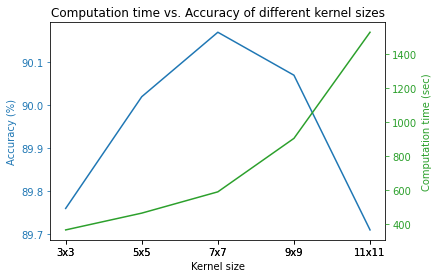

In [7]:
accuracies = [89.76, 90.02, 90.17, 90.07, 89.71]
computation_times = [367.45130729675293, 465.99384212493896, 590.9224827289581, 904.6217577457428, 1527.3669776916504]
kernel_sizes = ['3x3', '5x5', '7x7', '9x9', '11x11']

fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
color1 = 'tab:blue'
color2 = 'tab:green'


ax.plot(kernel_sizes, accuracies, color=color1)
ax.set_xlabel("Kernel size", color="black")
ax.set_ylabel("Accuracy (%)", color=color1)
ax.tick_params(axis='x', colors="black")
ax.tick_params(axis='y', colors=color1)

ax2.plot(kernel_sizes, computation_times, color=color2)
ax2.yaxis.tick_right()
ax2.set_ylabel('Computation time (sec)', color=color2)
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='y', colors=color2)

plt.title("Computation time vs. Accuracy of different kernel sizes")

plt.plot()
plt.show()

In [8]:
max_acc = max(accuracy_list)
epoch_max = accuracy_list.index(max_acc)

print("The max accuracy is: {}%".format(max_acc))
print("The epoch is: ", epoch_max)

The max accuracy is: 91.71000000000001%
The epoch is:  18


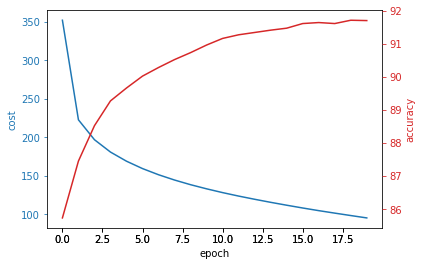

In [9]:
epochs_arr = [i for i in range(epochs)]

x_values1 = epochs_arr
y_values1 = cost_list
color1 = 'tab:blue'

x_values2 = epochs_arr
y_values2 = accuracy_list
color2 = 'tab:red'

fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.plot(x_values1, y_values1, color=color1)
ax.set_xlabel("epoch", color="black")
ax.set_ylabel("cost", color=color1)
ax.tick_params(axis='x', colors="black")
ax.tick_params(axis='y', colors=color1)

ax2.plot(x_values2, y_values2, color=color2)
ax2.yaxis.tick_right()
ax2.set_ylabel('accuracy', color=color2)
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='y', colors=color2)

plt.show()